# Capstone-The-Battle-of-Neighborhood

The final project for the IBM capstone course

# Main Questions:

It is well known that New York City is the center of midwest and food there is really good. As a Asian student nearby, I really like to take bus to the city for a good meal on weekend. At this time, I want to use the knowledge I learned here to solve the following questions: 

• What is the best location to enjoy Asian food in NYC?

• Is it a good idea to open a Asian restaurant in NYC now?

P.S In case I get to much information later in data processing, I limit the Asian restaurant for only Thai restaurant.

# Methodology

• Data will be collected from https://geo.nyu.edu/catalog/nyu-2451-34572, which has been used as an example before, and cleaned and processed into a dataframe.

• FourSquare be used to locate all venues and then filtered by Asian food restaurants. Ratings, tips, and likes by users will be counted and added to the dataframe.

• Data will be sorted based on rankings and be visually assessed by using graphing from Python libraries.

In [2]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests 
import json
from bs4 import BeautifulSoup
import os

! pip install folium==0.5.0 
import folium 

! pip install geopy
from geopy.geocoders import Nominatim 
import requests 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries loaded done')

     |████████████████████████████████| 79 kB 7.9 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=93821bf5b92e9c263a35909a55c29bbb95e51963b2488fe74f6e96b6a7650bde
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Libraries loaded done


In [3]:
CLIENT_ID = '5ISLCUZRLCCZ4M0K4BIRVA2F1TPDI3MX1B2U1MIZI0SMGBDM' # your Foursquare ID
CLIENT_SECRET = 'BQRRDJD20RLJFCV2JAOTSU5PAISMR5Y2MO4SFOBC0W5LTONO ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5ISLCUZRLCCZ4M0K4BIRVA2F1TPDI3MX1B2U1MIZI0SMGBDM
CLIENT_SECRET:BQRRDJD20RLJFCV2JAOTSU5PAISMR5Y2MO4SFOBC0W5LTONO 


In [4]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=500
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [5]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    
    features=resp['features']

    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [6]:
ny_data = get_new_york_data()
ny_data.head()


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


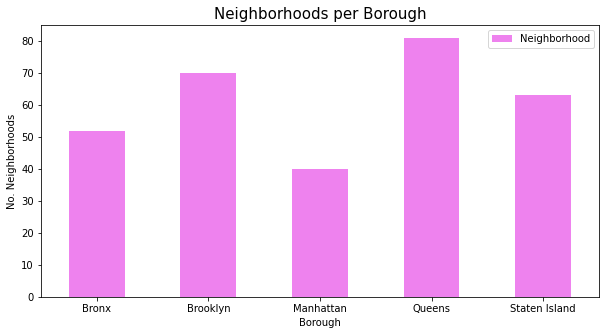

In [7]:
clr = "violet"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough', fontsize = 15)
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('No. Neighborhoods',fontsize = 10)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [22]:
ny_data.values.tolist()

[['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902],
 ['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398],
 ['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412],
 ['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682],
 ['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857],
 ['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604],
 ['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981],
 ['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176],
 ['Bronx', 'Norwood', 40.87722415599446, -73.8793907395681],
 ['Bronx', 'Williamsbridge', 40.88103887819211, -73.85744642974207],
 ['Bronx', 'Baychester', 40.866858107252696, -73.83579759808117],
 ['Bronx', 'Pelham Parkway', 40.85741349808865, -73.85475564017999],
 ['Bronx', 'City Island', 40.84724670491813, -73.78648845267413],
 ['Bronx', 'Bedford Park', 40.870185164975325, -73.8855121841913],
 ['Bronx', 'University Heights', 40.85572707719664, -73.9104159619131],
 ['Bronx',

In [22]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
as_rest_ny=pd.DataFrame(columns=column_names)
i=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    asian_restaurants=venues[venues['Category']=='Thai Restaurant']   
    print('(',i,'/',len(ny_data),')','Asian Restaurant in '+Neighborhood+', '+Borough+':'+str(len(asian_restaurants)))
    print(row)
    for resturant_detail in asian_restaurants.values.tolist():
        id, name , category=resturant_detail
        as_rest_ny = as_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    i = i + 1

as_rest_ny.to_csv('as_rest_ny_tocsv1.csv')
as_rest_ny = pd.read_csv('as_rest_ny_tocsv1.csv')
as_rest_ny.head(10)

( 1 / 306 ) Asian Restaurant in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Asian Restaurant in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Asian Restaurant in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Asian Restaurant in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Asian Restaurant in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Asian Restaurant in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Asian Restaurant in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Asian Restaurant in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Asian Restaurant in Norwood, Bronx:0
['Bronx', 'Norwood', 40.87722

,Unnamed: 0,Borough,Neighborhood,ID,Name
0,0,Bronx,Spuyten Duyvil,4a739e29f964a520f5dc1fe3,Siam Square
1,1,Bronx,Pelham Bay,4b4c90d3f964a52046b626e3,Honey's Thai Pavilion
2,2,Brooklyn,Bay Ridge,50e8d45ae4b06202fbe39b08,Top Thai
3,3,Brooklyn,Bay Ridge,4c1993344ff90f474d421049,Bangkok Tokyo
4,4,Brooklyn,Kensington,4b36a0f5f964a5207b3925e3,To Be Thai
5,5,Brooklyn,Kensington,54daa265498e58e310cae373,Sawasde Thai Cooking
6,6,Brooklyn,Prospect Heights,57117904498eea6297e41d0a,Muse
7,7,Brooklyn,Prospect Heights,56773ac0498e301585915c6f,LOOK by Plant Love House
8,8,Brooklyn,Prospect Heights,58fe480bda708012683cda5f,Nourish Thai Food Oasis
9,9,Brooklyn,Brooklyn Heights,476f8da1f964a520044d1fe3,Lantern Thai Kitchen


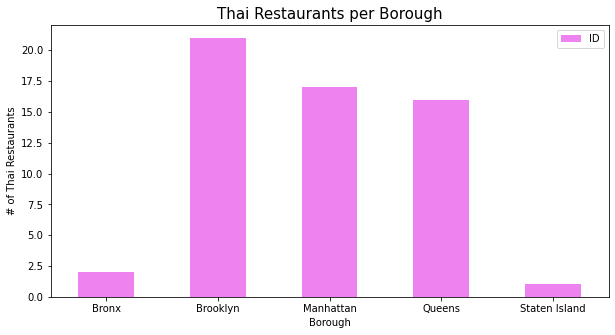

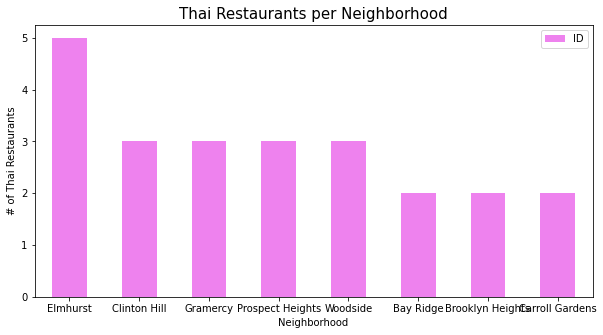

In [24]:
as_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Thai Restaurants per Borough', fontsize = 15)
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('# of Thai Restaurants', fontsize=10)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()


NOofNeigh = 8 # top number for graphing all the same past 8
as_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Thai Restaurants per Neighborhood', fontsize = 15)
plt.xlabel('Neighborhood', fontsize = 10)
plt.ylabel('# of Thai Restaurants', fontsize=10)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [39]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
as_rest_stats_ny=pd.DataFrame(columns=column_names)
i = 1
for row in as_rest_ny.values.tolist():
    index,Borough,Neighborhood,ID,Name=row
    print(Borough)
    print(Neighborhood)
    print(ID)
    print(Name)
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    print('(',i,'/',len(as_rest_ny),')','processed')
    as_rest_stats_ny = as_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    i = i + 1
    
as_rest_stats_ny.tail()
as_rest_stats_ny.to_csv('as_rest_stats_ny_csv.csv')
as_rest_stats_ny.info()

Bronx
Spuyten Duyvil
4a739e29f964a520f5dc1fe3
Siam Square
{'meta': {'code': 200, 'requestId': '5f9d933a6304202de9b49365'}, 'response': {'venue': {'id': '4a739e29f964a520f5dc1fe3', 'name': 'Siam Square', 'contact': {'phone': '7184328200', 'formattedPhone': '(718) 432-8200'}, 'location': {'address': '564 Kappock St', 'lat': 40.8787962348852, 'lng': -73.91670090763066, 'labeledLatLngs': [{'label': 'display', 'lat': 40.8787962348852, 'lng': -73.91670090763066}, {'label': 'entrance', 'lat': 40.878772, 'lng': -73.916958}], 'postalCode': '10463', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['564 Kappock St', 'Bronx, NY 10463', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/siam-square/4a739e29f964a520f5dc1fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, '

In [40]:
as_rest_stats_ny['Likes'] = as_rest_stats_ny['Likes'].astype('float64')
as_rest_stats_ny['Tips'] = as_rest_stats_ny['Tips'].astype('float64')
as_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       57 non-null     object 
 1   Neighborhood  57 non-null     object 
 2   ID            57 non-null     object 
 3   Name          57 non-null     object 
 4   Likes         57 non-null     float64
 5   Rating        57 non-null     float64
 6   Tips          57 non-null     float64
dtypes: float64(3), object(4)
memory usage: 3.2+ KB


In [37]:
row

[0, 'Bronx', 'Spuyten Duyvil', '4a739e29f964a520f5dc1fe3', 'Siam Square']

In [41]:
as_rest_stats_ny.describe()

,Likes,Rating,Tips
count,57.000000,57.000000,57.000000
mean,83.263158,7.733333,31.017544
std,147.103162,1.657056,56.188932
min,0.000000,0.000000,0.000000
25%,15.000000,7.500000,6.000000
50%,29.000000,8.000000,12.000000
75%,61.000000,8.600000,27.000000
max,768.000000,9.400000,358.000000


In [42]:
as_rest_stats_ny.iloc[as_rest_stats_ny['Likes'].idxmax()]
as_rest_stats_ny.iloc[as_rest_stats_ny['Rating'].idxmax()]
as_rest_stats_ny.iloc[as_rest_stats_ny['Tips'].idxmax()]


Borough                           Queens
Neighborhood                    Woodside
ID              3fd66200f964a5204ef11ee3
Name                          SriPraPhai
Likes                                768
Rating                               8.9
Tips                                 358
Name: 36, dtype: object

In [43]:
ny_neighborhood_stats=as_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
5,Chinatown,9.4
20,Little Italy,9.3
19,Lenox Hill,9.1
12,Flatiron,8.9
35,Yorkville,8.8
4,Carroll Gardens,8.7
24,Red Hook,8.6
15,Hunters Point,8.6
26,South Side,8.5
16,Jackson Heights,8.4


In [44]:
ny_borough_stats=as_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.300000
1,Brooklyn,7.614286
4,Staten Island,7.600000
3,Queens,7.350000
0,Bronx,7.300000


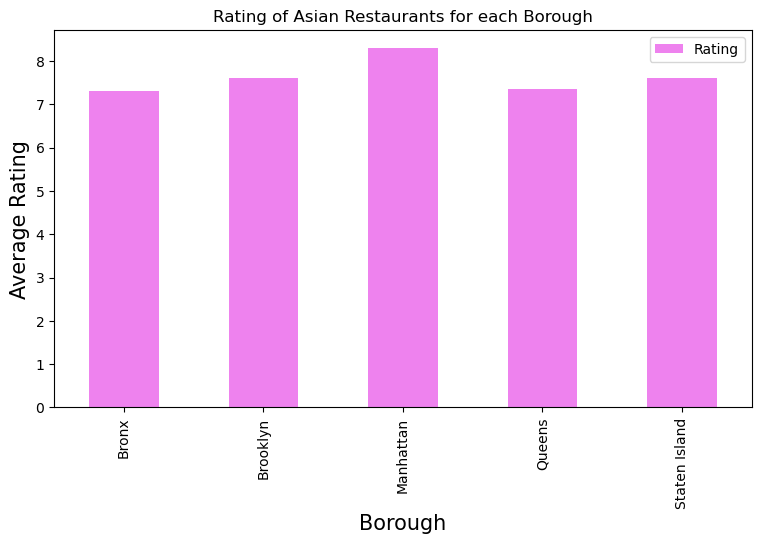

In [45]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Rating of Asian Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
as_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

In [52]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Bay Ridge,40.625801,-74.030621,3.600000
1,Queens,Bayside,40.766041,-73.774274,7.200000
2,Brooklyn,Brooklyn Heights,40.695864,-73.993782,7.550000
3,Staten Island,Bulls Head,40.609592,-74.159409,7.600000
4,Brooklyn,Carroll Gardens,40.680540,-73.994654,8.700000
5,Manhattan,Chinatown,40.715618,-73.994279,9.400000
6,Brooklyn,Clinton Hill,40.693229,-73.967843,8.266667
7,Brooklyn,Cobble Hill,40.687920,-73.998561,7.300000
8,Brooklyn,Downtown,40.690844,-73.983463,8.250000
9,Manhattan,East Harlem,40.792249,-73.944182,8.200000


In [75]:
#mapping it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
rating = folium.map.FeatureGroup()

for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
       rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, 
            color='blue',
            fill=True,
            fill_color='red',
            fill_opacity=1
        )
      )

ny_map.add_child(rating)

In [65]:
rating = folium.map.FeatureGroup()
